SYSEN 5888 Spring 2026

Jonathan Lloyd

Homework 1, Question 2


Goal: Use the perceptron algorithm to iterate until convergence

Tools: Numpy

Data: 
- Positive class (+1): (1,3)
- Negative class (-1): (-1,4)

Task: Determine the number of updates until convergence using the perceptron algorithm. You must iterate over data points in the order: [(1,3),(-1,4)]. Your output should be the sequence of updates in the form $\mathbf{w}_i = [w_1,..,w_n]$

**Perceptron Algorithm:**

1. **Input:** Training data set: $(\mathbf{x_1}, y_1), \ldots, (\mathbf{x_N}, y_N)$
2. **Initialization:**
  - Weight vector: $\mathbf{w}^{(s)} = [0, \ldots, 0]$
  - Iteration count: $s = 0$
3. **Update Loop:**
  - While there exists an instance $i \in [N]$ such that the prediction is incorrect, i.e., $y  \mathbf{w}^{(s)} \cdot \mathbf{x} \leq 0$:
  - Update weight:
    - For positive instances: $\mathbf{w}^{(s+1)} = \mathbf{w}^{(s)} + \mathbf{x}$
    - For negative instances: $\mathbf{w}^{(s+1)} = \mathbf{w}^{(s)} - \mathbf{x}$
  - Increment counter: $s = s + 1$
4. **Output:** Final weight vector: $\mathbf{w}^{(s)}$


Number of updates until convergence: 5

Sequence of weight updates:
	w_1 = [1.0, 3.0]
	w_2 = [2.0, -1.0]
	w_3 = [3.0, 2.0]
	w_4 = [4.0, -2.0]
	w_5 = [5.0, 1.0]

Final weight vector: w = [5.0, 1.0]


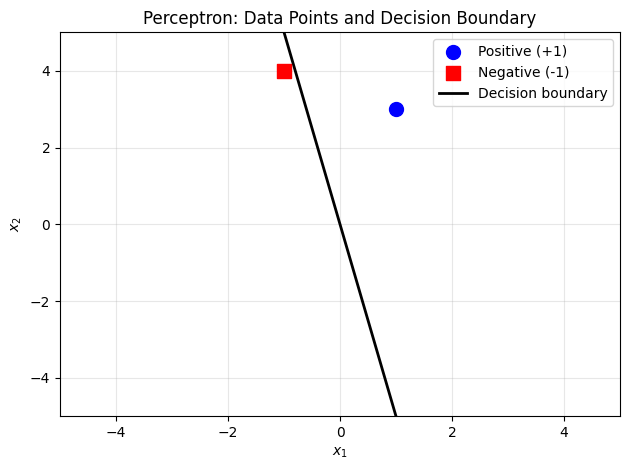

In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define training data (vector form x = [x1, x2])
# Positive class (+1): (1, 3)
# Negative class (-1): (-1, 4)
# Order: [(1,3), (-1,4)]
X = np.array([[1, 3],    # (1, 3), y = +1
              [-1, 4]])  # (-1, 4), y = -1
y = np.array([1, -1]) # classes

# Initialize weight vector: w^(s) = [0, ..., 0]
w = np.zeros(2)

# Initialize iteration counter: s = 0
update_sequence = []
s = 0

# Update Loop: While there exists instance i such that y * w · x <= 0
converged = False
while not converged:
    misclassified = False
    for i in range(len(X)): # Iterate data in order
        # Prediction incorrect if y * w^(s) · x <= 0
        if y[i] * np.dot(w, X[i]) <= 0:
            # For positive instances: w^(s+1) = w^(s) + x
            # For negative instances: w^(s+1) = w^(s) - x
            if y[i] == 1:
                w = w + X[i]
            else:
                w = w - X[i]
            s = s + 1
            update_sequence.append(w.copy())
            misclassified = True
            break  # Restart from beginning of the dataset after each update
    if not misclassified:
        converged = True

# Output: Final weight vector w^(s)
print(f"Number of updates until convergence: {s}")
print("\nSequence of weight updates:")
for i, w_i in enumerate(update_sequence):
    print(f"\tw_{i+1} = [{', '.join(f'{x:.1f}' for x in w_i)}]")
print(f"\nFinal weight vector: w = [{', '.join(f'{x:.1f}' for x in w)}]")

# Plot points and final decision boundary
plt.figure()

# Plot data points
plt.scatter(1, 3, c='blue', s=100, marker='o', label='Positive (+1)', zorder=5)
plt.scatter(-1, 4, c='red', s=100, marker='s', label='Negative (-1)', zorder=5)

# Plot decision boundary: w · x = 0 -> w1*x1 + w2*x2 = 0 => x2 = -w1*x1/w2
x1_line = np.linspace(-5, 5, 100)
if w[1] != 0:
    x2_line = (-w[0] * x1_line) / w[1]
    plt.plot(x1_line, x2_line, 'k-', linewidth=2, label='Decision boundary')
else:
    # Vertical line when w2=0: x1 = 0
    plt.axvline(x=0, color='k', linewidth=2, label='Decision boundary')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.legend()
plt.grid(True, alpha=0.3)
plt.title('Perceptron: Data Points and Decision Boundary')
plt.tight_layout()
plt.show()